# **Dependencies Install**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#**Skewness of Dataset**

In [4]:
cnt = {}
df = pd.read_csv('/content/drive/MyDrive/900_data - We_gpt.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/900_data - We_gpt.csv'

In [13]:
non_complaint = (df['Complaint/Non Complaint'] == 0).sum()

print("Total Dataset: ", len(df))
print(f"Number of Complaints are {len(df) - non_complaint}")
print(f"Number of non complaints are {non_complaint}")

Total Dataset:  876
Number of Complaints are 480
Number of non complaints are 396


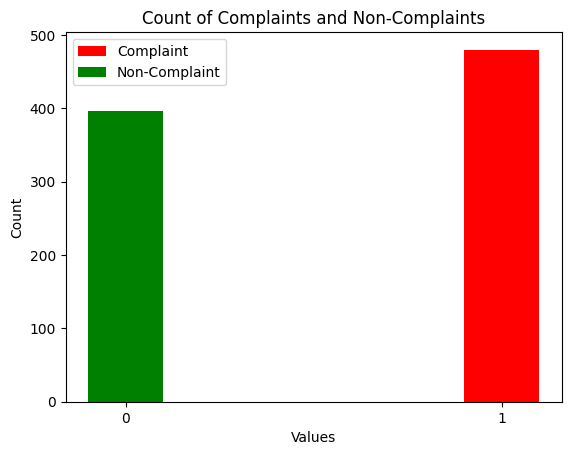

In [14]:
value_counts = df['Complaint/Non Complaint'].value_counts()
bar_width =0.2
plt.bar(value_counts.index, value_counts.values, color=['Red', 'Green'], label=['Complaint', 'Non-Complaint'], width=bar_width)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Complaints and Non-Complaints')
plt.xticks([0, 1])
plt.legend()
plt.show()

# **Number of words Analysis**

In [ ]:
# pip install nltk

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def clean_and_count_words(text):
    tokens = word_tokenize(text)

    table = str.maketrans('', '', string.punctuation)
    words = [word.lower() for word in tokens if word.isalpha()]
    words = [word.translate(table) for word in words]

    # stop_words = set(stopwords.words('english'))
    # words = [word for word in words if word not in stop_words]
    word_count = len(words)

    return word_count



# Apply the clean_and_count_words function to the 'review' column
df['word_count'] = df['Full Complaint'].apply(clean_and_count_words)

# Display the DataFrame with word counts
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                  Sheet                                     Full Complaint  \
0                 Voxya  I placed an order for medicines on Medi*All.co...   
1                 Voxya  Got bad experience from new angel beauty parlo...   
2    Consumer Complaint  We went to dr thankam for our 9th month scanni...   
3                 Voxya  My father was admitted in Hoapital due to some...   
4    Consumer Complaint             Sabhi staff ka behave achcha nahin hai   
..                  ...                                                ...   
871               Voxya  the application showing payment given in cash ...   
872   Complaint Mining   Phellip morri and vijay pappu land rovR cars c...   
873   Complaint Mining   Dear MOMIN MOHD MUSHTAQUE MOHD ISMAIL,\n \n *I...   
874               Voxya  Hello,\n \n \n I have paid ***** by ** Jun ***...   
875                 NaN  Timely Service\n\nI appreciated the timely ser...   

             Domain  Complaint/Non Complaint    Aspect 1   Aspe

In [16]:
short_reviews = df[df['word_count'] < 90]
short_reviews = short_reviews.reset_index(drop=True)

In [17]:
short_reviews.to_csv('phase2.csv', index=False)

In [18]:
non_complaint = (short_reviews['Complaint/Non Complaint'] == 0).sum()

print("Total Dataset: ", len(short_reviews))
print(f"Number of Complaints are {len(short_reviews) - non_complaint}")
print(f"Number of non complaints are {non_complaint}")

Total Dataset:  575
Number of Complaints are 273
Number of non complaints are 302


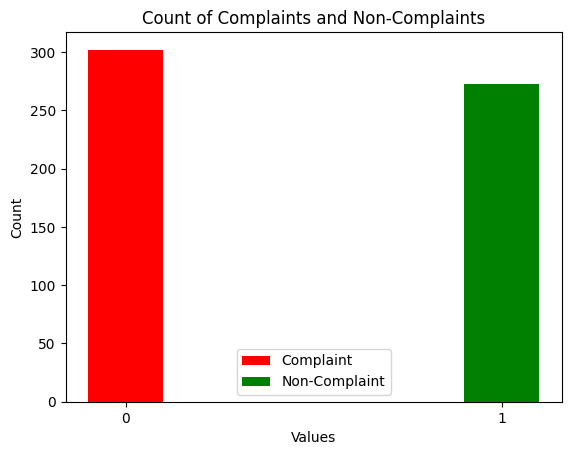

In [19]:
value_counts = short_reviews['Complaint/Non Complaint'].value_counts()
bar_width =0.2
plt.bar(value_counts.index, value_counts.values, color=['Red', 'Green'], label=['Complaint', 'Non-Complaint'], width=bar_width)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Complaints and Non-Complaints')
plt.xticks([0, 1])
plt.legend()
plt.show()

# **Mistral Model Loading**

In [20]:
!pip install peft -q
!pip install accelerate -q
!pip install bitsandbytes -q
!pip install --upgrade transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 985.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [21]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
from transformers import BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-Instruct-v0.1"

compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=False,
)

In [22]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [23]:
model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                         )
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [30]:
generation_config = model.generation_config
generation_config.max_new_tokens = 100                          #Avg length of output generated by model
generation_config.temperature = 0.08                             #Smaller temp - fact; Larger temp - Creativity to model (Defrines randomness)
generation_config.top_p = 0.07                                    #top_p - Nuclueus Sampling, takes only (top_p) samples, large- Diverse, small - facts
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id
generation_config.do_sample = True  # Adjust based on your preference for sampling

In [32]:
from transformers import StoppingCriteria, StoppingCriteriaList

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = 2996
        if ']' in tokenizer.decode(input_ids[0][-1]):
          return True
        return False

In [26]:
non_comp = short_reviews[short_reviews['Complaint/Non Complaint']==0]
non_comp = non_comp.reset_index(drop=True)
print("Total number of Non Complaints :", len(non_comp))

Total number of Non Complaints : 302


In [27]:
non_comp['Full Complaint'][0]

'We have had health insurance policy, I had to pay 20000 for just processing fee for my Mother surgery.'

# **Zero Shot Binary Classification**

In [33]:
prediction = []
i=0

for review in short_reviews['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""Your task is to classify text.

  Choose the class among the following classes with the highest probability in a python list.
  Only return the label in python list, nothing more:

   ###Classes###
  'Complaint', 'Non-Complaint'

  For this task, consider the reviews apart from heathcare domain as indicative of 'Non-Complaint.'

        The text to classify:
  ```
  {review}
  ```

  Your response:[
  """.strip()

  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1,  # Set this to 1

        stopping_criteria=StoppingCriteriaList([StopOnTokens()])
    )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  prediction.append(response_label)
  i=i+1
  print(i)
  print(response_label)

1
[Non-Complaint]
2
[ 'Complaint' ]
3
[ 'Non-Complaint' ]
4
[Non-Complaint]
5
[ 'Complaint']
6
[Non-Complaint]
7
[ 'Complaint' ]
8
[ 'Complaint' ]
9
[Non-Complaint, Non-Complaint]
10
[ 'Complaint' ]
11
[Non-Complaint]
12
[Non-Complaint]
13
[ 'Complaint' ]
14
[Non-Complaint]
15
[Non-Complaint]
16
[ 'Complaint' ]
17
[ 'Complaint' ]
18
[Non-Complaint]
19
[Non-Complaint]
20
[ 'Complaint' ]
21
[protected]
22
[['Complaint']
23
[Non-Complaint]
24
[Non-Complaint]
25
[Non-Complaint]
26
[Non-Complaint]
27
[Non-Complaint]
28
[Non-Complaint]
29
[Non-Complaint]
30
[ 'Complaint' ]
31
[ 'Complaint' ]
32
[Non-Complaint]
33
[Non-Complaint]
34
[ 'Complaint' ]
35
[Non-Complaint]
36
[ 'Complaint' ]
37
[Non-Complaint]
38
[ 'Complaint' ]
39
[Non-Complaint]
40
[ 'Complaint' ]
41
[Non-Complaint]
42
[Non-Complaint]
43
[ 'Complaint' ]
44
[Non-Complaint]
45
[Non-Complaint]
46
[ 'Complaint' ]
47
[ 'Complaint' ]
48
[Non-Complaint]
49
[ 'Complaint' ]
50
[ 'Complaint' ]
51
[protected]
52
[ 'Complaint' ]
53
[ 'Compla

In [34]:
non_comp['Full Complaint'][58]

'The treatment and care towards the patient is ultimate. The exuberant spirit of nursing staff is remarkable & i expect the same towards all the patients of Medihope Hospital. I was in the icu for 5 days and the treatment given was excellent. Great job by Dr. Agarwal.'

In [35]:
prediction = [pre.split()[-1] for pre in prediction]

In [36]:
pre_result = [1 if cls == 'Complaint' else 0 for cls in prediction]

In [37]:
conf_matrix = confusion_matrix(short_reviews['Complaint/Non Complaint'], pre_result)

In [38]:
accuracy = accuracy_score(short_reviews['Complaint/Non Complaint'], pre_result)
precision = precision_score(short_reviews['Complaint/Non Complaint'], pre_result)
recall = recall_score(short_reviews['Complaint/Non Complaint'], pre_result)
f1 = f1_score(short_reviews['Complaint/Non Complaint'], pre_result)

# Display the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[302   0]
 [273   0]]

Accuracy: 0.5252173913043479
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Few Shot Binary Classification**

In [ ]:
prediction = []
i=0
from tqdm.notebook import tqdm
for review in tqdm(short_reviews['Full Complaint']):
    # %%time
    device = "cuda:0"

    prompt = f"""<<SYS>>Your task is to classify text.

Choose the class among the following classes with the highest probability.
Only return the label in python list, nothing more:

### Classes:
1: 'Complaint'
0: 'Non-Complaint'
<</SYS>>[INST]### Text:
```
Dear Sir /madam,
I am a employee at EENADU journalism college and my wife is admitted at ESIC Nacharam, Hyderabad with a bone breakage in the right elbow on
Saturday evening 22/04/2023 and the condition of the hospital is worst everywhere human waste and employees not taking care of patients there is
no proper response from doctors and today is Wednesday but there is no progress can you please have look into the issue asap
```
[/INST]Label: 1</s><s>[INST]### Text:
```
Good morning sir we are living in chennai ramapuram here nearby miot hospital ramapuram road mgr house road there is one wine shop and
more than 20 infected dogs biting and barking everyone in evening 7to10 time people's get troubled and afraid to come that side kindly please
solve this issue. Women's and childrens were there already we get troubling by drunken guys
```
[/INST]Label : 0</s><s>[INST]### Text:
```
{review}
```
[/INST]Label: """.strip()

    encoding = tokenizer(prompt, return_tensors="pt").to(device)
    # print(f"Token length = {len(encoding['input_ids'][0])}",end = ' Label = ')
    with torch.inference_mode():
        outputs = model.generate(
            **encoding,
            top_k = 1,
            max_new_tokens = 2,
            pad_token_id = 2,
            # stopping_criteria=StoppingCriteriaList([StopOnTokens()])
        )

    predict = tokenizer.decode(
        outputs[0][len(encoding['input_ids'][0]):],
        skip_special_tokens=True
    )
    prediction.append(predict.strip("' \n"))
    print(predict)

In [ ]:
pre_result = []

for pre in prediction:
  if pre == '1':
    pre_result.append(1)
  else:
    pre_result.append(0)

In [ ]:
conf_matrix = confusion_matrix(short_reviews['Complaint/Non Complaint'], pre_result)
accuracy = accuracy_score(short_reviews['Complaint/Non Complaint'], pre_result)
precision = precision_score(short_reviews['Complaint/Non Complaint'], pre_result)
recall = recall_score(short_reviews['Complaint/Non Complaint'], pre_result)
f1 = f1_score(short_reviews['Complaint/Non Complaint'], pre_result)

# Display the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
short_reviews['Binary Pred']= pre_result

# **Prediction Analysis**

In [ ]:
short_reviews['Predictions'] = pre_result_f            # pre_result_f  for few shot, pre_result for zero shot

short_non_complaint = (short_reviews['Predictions'] == 0).sum()

print("Total Dataset: ", len(short_reviews))
print(f"Number of Complaints are {len(short_reviews) - short_non_complaint}")
print(f"Number of non complaints are {short_non_complaint}")

In [ ]:
#segregating only predicted complaints from the dataset

aspect_df = short_reviews[short_reviews['Predictions'] == 1]

In [ ]:
aspect_df

# **Aspect class Zero Shot**

In [ ]:
aspect_pred = []
i=0

for review in aspect_df['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""
        ###Instruction###
        You are a text classifier for healthcare domain, you are expert in classify the text.
        Classify the text given to you in one or more most relevant Aspect classes, but not more than 6 classes,
        your response must have most relevant Aspect classes in a list using comma as a delimiter,
        do not give any explanation or any note, only return the python list containing relevant Aspect classes.

              ### Aspect Classes ###
              1. 'Product'
              2. 'Negligence'
              3. 'Dispute'
              4. 'Service'
              5. 'Billing'
              6. 'Shortage'
              7. 'Accusation'
              8. 'Behaviour'
              9. 'Dirty'
              10. 'Online'
              11. 'Time'
              12.'Pharmacy'

        ###Find Aspect classes for below text###
        {short_reviews['Full Complaint'][152]}

        Your response:[
        """.strip()



  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        # generation_config = generation_config,
        num_return_sequences=1,  # Set this to 1

        stopping_criteria=StoppingCriteriaList([StopOnTokens()])

        )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  print(response_label)

In [ ]:
short_reviews['Full Complaint'][152]


In [ ]:
device = "cuda:0"

prompt = f"""
      ###Instruction###
      You are a text classifier for healthcare domain, you are expert in classify the text.
      Classify the text given to you in one or more most relevant Aspect classes, but not more than 6 classes,
      your response must have most relevant Aspect classes in a list using comma as a delimiter,
      do not give any explanation or any note, only return the python list containing relevant Aspect classes.

            ### Aspect Classes ###
            1. 'Billing'
            2. 'Negligence'
            3. 'Behaviour'
            4. 'Service'
            5. 'Time'
            6. 'Shortage'
            7. 'Accusation'
            8. 'Dispute'
            9. 'Dirty'
            10. 'Online'
            11. 'Pharmacy'
            12. 'Product'

      ###Find Aspect classes for below text###
      {short_reviews['Full Complaint'][152]}

      Your response:[
      """.strip()



encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      # generation_config = generation_config,
      num_return_sequences=1,  # Set this to 1

      stopping_criteria=StoppingCriteriaList([StopOnTokens()])

      )

predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
# print(predict)
response_index = predict.find("Your response:")
response_label = predict[response_index + len("Your response:"):].strip()
print(response_label)

# **Aspect class few Shot**

In [ ]:
from transformers import StoppingCriteria, StoppingCriteriaList

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = 2996
        if ']' in tokenizer.decode(input_ids[0][-1]):
          return True
        return False

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens = 100                          #Avg length of output generated by model
generation_config.temperature = 0.08                             #Smaller temp - fact; Larger temp - Creativity to model (Defrines randomness)
generation_config.top_p = 0.07                                    #top_p - Nuclueus Sampling, takes only (top_p) samples, large- Diverse, small - facts
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id
generation_config.do_sample = True  # Adjust based on your preference for sampling

In [ ]:
pred = []
i=0
from tqdm.notebook import tqdm
for review in tqdm(short_reviews['Full Complaint']):
    # %%time
    device = "cuda:0"

    prompt = f"""<<SYS>>Your task is to classify text.

Choose one or more labels among the following possibilities with the highest probability.
Only return the labels in python list, nothing more:

### Classes:
1: 'Service'
2: 'Negligence'
3: 'Behaviour'
4: 'Cleanliness'
5: 'Pharmacy'
6: 'Unprofessionalism'
7: 'Inefficiency'
8: 'Unavailibility'
9: 'Billing'

<</SYS>>[INST]### Text:
```
In the initial conversation with Dr. Amrutha on a video call I particularly asked about IPR where I was told that toothsi aligners are easy
like wearing a specs. However after the payment was done I was told about IPR. Now I am in my last trimester of my pregnancy and suffering
from perforation as there is a hole in my ear drum, which needs to be operated post my delivery. I am asking for the refund but they are denying
and disconnecting my calls. They are literally harassing me mentally.
```
[/INST]Label : [Service, 4]</s><s>[INST]### Text:
```
Dear sir, I have placed order on Medi*all.Com.Order #MA****** and MA****** was placed on July **, **** but my order not delivered.i had made payment
through credit card. Order related to infant formula milk similar advance stage *.I need my order on urgent basis. They are not dispatching my order
nor refund my money.. I am unable to communicate them. They are not over contact number Or email address. How are these people even trading. Terrible
service. Not respond over email and contact. Please do the needful as soon as possible
```
[/INST]Label : [10, 5]</s><s>[INST]### Text:
```
{review}
```
[/INST]Label: """.strip()

    encoding = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.inference_mode():
        outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1,  # Set this to 1

        stopping_criteria=StoppingCriteriaList([StopOnTokens()])
    )

    predict = tokenizer.decode(outputs[0][len(encoding[0]):], skip_special_tokens=True)
    print(predict)
    # response_index = predict.find("Your response:")
    # response_label = predict[response_index + len("Your response:"):].strip()
    pred.append(predict)
    # i=i+1
    # #print(i)
    # print(r)

In [ ]:
short_reviews['Multilabel pred']= pred
short_reviews.to_csv('mistral_instruct.csv', index=False)